
# Importing all the Packages

In [266]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import ast
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iamda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



# Importing the Datasets from Pandas Libraries

In [312]:

df = pd.read_csv(r"C:\Users\iamda\OneDrive\Desktop\jupyter\project\only datasets here\Anime_data.csv")


# Show the Top 5 Rows

In [313]:
df.head()

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bounty—such is the life o...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",TV,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"['Action', 'Magic', 'Police', 'Supernatural', ...",Witches are individuals with special powers li...,TV,['Bandai Visual'],['Sunrise'],7.34,31875.0,1278.0,74889.0,26.0,Original,"Jul 2, 2002 to Dec 24, 2002",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",It is the dark century and the people are suff...,TV,NaN,['Toei Animation'],7.04,4757.0,3968.0,11247.0,52.0,Manga,"Sep 30, 2004 to Sep 29, 2005",https://myanimelist.net/anime/8/Bouken_Ou_Beet


# About the project


<h3>1. In this problem, I am creating a recommendation system using the cosine library. The datasetss being used is on anime-based datasets.
<br>
<br>
2. If a user selects one anime,the system will display 5 other similar anime movie

</h3>


## Shape of the datasets

In [314]:

print(f"Size of the datasets: {df.shape}")

Size of the datasets: (17002, 15)



## Checking the null value

In [315]:

df.isnull().sum()

Anime_id         0
Title            0
Genre         2012
Synopsis      1419
Type           634
Producer      9367
Studio        9083
Rating        2577
ScoredBy      3775
Popularity     634
Members          0
Episodes      2917
Source        1927
Aired          634
Link           634
dtype: int64


### There are many null values in this dataset


## Percentage

In [316]:

df.isnull().mean()*100

Anime_id       0.000000
Title          0.000000
Genre         11.833902
Synopsis       8.346077
Type           3.728973
Producer      55.093518
Studio        53.423127
Rating        15.157040
ScoredBy      22.203270
Popularity     3.728973
Members        0.000000
Episodes      17.156805
Source        11.333961
Aired          3.728973
Link           3.728973
dtype: float64


## Checking the datatype

In [317]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17002 entries, 0 to 17001
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Anime_id    17002 non-null  int64  
 1   Title       17002 non-null  object 
 2   Genre       14990 non-null  object 
 3   Synopsis    15583 non-null  object 
 4   Type        16368 non-null  object 
 5   Producer    7635 non-null   object 
 6   Studio      7919 non-null   object 
 7   Rating      14425 non-null  float64
 8   ScoredBy    13227 non-null  float64
 9   Popularity  16368 non-null  float64
 10  Members     17002 non-null  float64
 11  Episodes    14085 non-null  float64
 12  Source      15075 non-null  object 
 13  Aired       16368 non-null  object 
 14  Link        16368 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 1.9+ MB



## Check duplicated rows

In [318]:

print(f"The number of duplication rows: {df.duplicated().sum()}")

The number of duplication rows: 63



There are 63 duplicated row


## Droping the Duplicated rows

In [320]:
df.drop_duplicates(inplace=True)
print(f"After removing duplicated rows: {df.duplicated().sum()}")

After removing duplicated rows: 0



## Statistics technique

In [321]:

df.describe()

,Anime_id,Rating,ScoredBy,Popularity,Members,Episodes
count,16939.000000,14390.000000,1.318900e+04,16305.000000,1.693900e+04,14044.000000
mean,20428.324517,6.285270,1.134638e+04,8149.880037,2.031810e+04,11.489747
std,14335.218181,1.141218,4.327876e+04,4712.735509,7.121438e+04,44.148682
min,1.000000,1.000000,1.000000e+00,1.000000,0.000000e+00,1.000000
25%,5579.500000,5.610000,4.300000e+01,4067.000000,1.450000e+02,1.000000
50%,21275.000000,6.410000,4.740000e+02,8140.000000,1.104000e+03,1.000000
75%,34757.500000,7.090000,3.785000e+03,12227.000000,7.802000e+03,12.000000
max,40960.000000,10.000000,1.006242e+06,16338.000000,1.451708e+06,1818.000000



## Seperate the Categorical columns and Numerical columns.

In [322]:

# define numerical and categorical
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
# print
print(f"we have {len(numerical_feature)} numerical feature {numerical_feature}")
print(f"we have {len(categorical_feature)} categorical feature {categorical_feature}")


we have 6 numerical feature ['Anime_id', 'Rating', 'ScoredBy', 'Popularity', 'Members', 'Episodes']
we have 9 categorical feature ['Title', 'Genre', 'Synopsis', 'Type', 'Producer', 'Studio', 'Source', 'Aired', 'Link']



# Data Preprocessing


## Selecting the important features for this project

1. Title

2. Genre

3. Synopsis

4. Type

These are the important columns


## Now droping all extra columns

In [323]:

df2 = df[['Title','Genre','Synopsis','Type']]


## And droped all the null values using dropna

In [324]:

df2.dropna(inplace=True)


## Show Top 5 Rows

In [325]:

df2.head()

,Title,Genre,Synopsis,Type
0,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV
1,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bounty—such is the life o...",Movie
2,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",TV
3,Witch Hunter Robin,"['Action', 'Magic', 'Police', 'Supernatural', ...",Witches are individuals with special powers li...,TV
4,Bouken Ou Beet,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",It is the dark century and the people are suff...,TV



## Again checking the null value

In [326]:

df2.isnull().sum()

Title       0
Genre       0
Synopsis    0
Type        0
dtype: int64


## Again Checking the shape of the dataset

In [327]:

print(f"Size of the datasets: {df2.shape}")

Size of the datasets: (13689, 4)



# Feature Enginnering


## Proportion of count data 

In [328]:

for col in categorical_feature:
    print(df[col].value_counts(normalize=True)*100)
    print("--------------------------------")

Title
Castlevania                           0.100360
RWBY                                  0.029518
Mutafukaz                             0.029518
Avatar: The Last Airbender            0.029518
Highschool DxD Hero                   0.023614
                                        ...   
Detective Conan vs. Wooo              0.005904
Mahou Shoujo Elena                    0.005904
Soccer Fever                          0.005904
SKET Dance: Tettei Bunseki Special    0.005904
Original C-V-P Momoko                 0.005904
Name: proportion, Length: 16737, dtype: float64
--------------------------------
Genre
['Hentai']                                                            5.466604
['Music']                                                             4.662692
['Comedy']                                                            4.006163
['Kids']                                                              2.518925
['Slice of Life']                                                     1.28


## Randomly Checking the data

In [329]:

df2['Genre'][0]

"['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space']"

In [330]:
df2['Genre'][10]

"['Action', 'Adventure', 'Comedy', 'Super Power', 'Martial Arts', 'Shounen']"

In [331]:
df2['Genre'][100]

"['Adventure', 'Comedy', 'Romance', 'Fantasy']"

In [332]:

df2['Synopsis'][0]

'In the year 2071, humanity has colonized several of the planets and moons of the solar system leaving the now uninhabitable surface of planet Earth behind. The Inter Solar System Police attempts to keep peace in the galaxy, aided in part by outlaw bounty hunters, referred to as "Cowboys." The ragtag team aboard the spaceship Bebop are two such individuals. \r\n  \r\nMellow and carefree Spike Spiegel is balanced by his boisterous, pragmatic partner Jet Black as the pair makes a living chasing bounties and collecting rewards. Thrown off course by the addition of new members that they meet in their travels—Ein, a genetically engineered, highly intelligent Welsh Corgi; femme fatale Faye Valentine, an enigmatic trickster with memory loss; and the strange computer whiz kid Edward Wong—the crew embarks on thrilling adventures that unravel each member\'s dark and mysterious past little by little. \r\n \r\nWell-balanced with high density action and light-hearted comedy,  Cowboy Bebop  is a spa

In [333]:

df2['Synopsis'][100]

'Makoto Mizuhara is working on his latest experiment in the school science lab, but when he takes a break his lifelong rival Katsuhiko Jinnai shows up and attempts to destroy the device and discredit Makoto. This overloads the experiment and transports Makoto, Jinnai, his sister Nanami, and their teacher Mr. Fujisawa to the strange and magnificent world El Hazard. Makoto and Fujisawa land squarely in the Kingdom of Roshtaria, and quickly befriend the princess Rune Venus. Jinnai allies himself with the Bugrom, a race of giant insects bent on taking over El Hazard, while his sister tries to eke out her own living in the desert. Makoto searches desperately for a way to return home, all the while fighting off the Bugrom, enlisting the help of the Holy Priestesses, and stopping the demon god Ifurita from destroying everything.  \r\n \r\n(Source: ANN)'


## Synopsis


#### In Synopsis Column removing the special symbols

In [334]:

# Making a function
def special_symbol(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    return text

df2['Synopsis'] = df2['Synopsis'].apply(special_symbol)


In [335]:
df2['Synopsis'][0]

'In the year       humanity has colonized several of the planets and moons of the solar system leaving the now uninhabitable surface of planet Earth behind  The Inter Solar System Police attempts to keep peace in the galaxy  aided in part by outlaw bounty hunters  referred to as  Cowboys   The ragtag team aboard the spaceship Bebop are two such individuals        Mellow and carefree Spike Spiegel is balanced by his boisterous  pragmatic partner Jet Black as the pair makes a living chasing bounties and collecting rewards  Thrown off course by the addition of new members that they meet in their travels Ein  a genetically engineered  highly intelligent Welsh Corgi  femme fatale Faye Valentine  an enigmatic trickster with memory loss  and the strange computer whiz kid Edward Wong the crew embarks on thrilling adventures that unravel each member s dark and mysterious past little by little       Well balanced with high density action and light hearted comedy   Cowboy Bebop  is a space Wester

In [336]:
df2['Synopsis'][1]

'Another day  another bounty such is the life of the often unlucky crew of the Bebop  However  this routine is interrupted when Faye  who is chasing a fairly worthless target on Mars  witnesses an oil tanker suddenly explode  causing mass hysteria  As casualties mount due to a strange disease spreading through the smoke from the blast  a whopping three hundred million woolong price is placed on the head of the supposed perpetrator       With lives at stake and a solution to their money problems in sight  the Bebop crew springs into action  Spike  Jet  Faye  and Edward  followed closely by Ein  split up to pursue different leads across Alba City  Through their individual investigations  they discover a cover up scheme involving a pharmaceutical company  revealing a plot that reaches much further than the ragtag team of bounty hunters could have realized        Written by MAL Rewrite '


### Now removing the extra spaces

In [337]:

# Making a function
def extra_space(text):
    text = re.sub('\s+[^a-zA-Z]\s+','',text)
    return text

df2['Synopsis'] = df2['Synopsis'].apply(special_symbol)


In [338]:

df2['Synopsis'][0]

'In the year       humanity has colonized several of the planets and moons of the solar system leaving the now uninhabitable surface of planet Earth behind  The Inter Solar System Police attempts to keep peace in the galaxy  aided in part by outlaw bounty hunters  referred to as  Cowboys   The ragtag team aboard the spaceship Bebop are two such individuals        Mellow and carefree Spike Spiegel is balanced by his boisterous  pragmatic partner Jet Black as the pair makes a living chasing bounties and collecting rewards  Thrown off course by the addition of new members that they meet in their travels Ein  a genetically engineered  highly intelligent Welsh Corgi  femme fatale Faye Valentine  an enigmatic trickster with memory loss  and the strange computer whiz kid Edward Wong the crew embarks on thrilling adventures that unravel each member s dark and mysterious past little by little       Well balanced with high density action and light hearted comedy   Cowboy Bebop  is a space Wester


## Removing the stopwords and converting into the lower case

In [339]:

def preprocessing(text):
    # converting into the lower case
    text = text.lower()
    # removing the stopwords
    pattern = re.compile(r'\b(' + '|'.join(stopwords.words('english')) + r')\b\s*')
    text = re.sub(pattern,'',text)

    return text

df2['Synopsis'] = df2['Synopsis'].apply(preprocessing)


In [340]:

df2['Synopsis'][0]

'year       humanity colonized several planets moons solar system leaving uninhabitable surface planet earth behind  inter solar system police attempts keep peace galaxy  aided part outlaw bounty hunters  referred cowboys   ragtag team aboard spaceship bebop two individuals        mellow carefree spike spiegel balanced boisterous  pragmatic partner jet black pair makes living chasing bounties collecting rewards  thrown course addition new members meet travels ein  genetically engineered  highly intelligent welsh corgi  femme fatale faye valentine  enigmatic trickster memory loss  strange computer whiz kid edward wong crew embarks thrilling adventures unravel member dark mysterious past little little       well balanced high density action light hearted comedy   cowboy bebop  space western classic homage smooth improvised music named written mal rewrite '

In [341]:

df2['Synopsis'][100]

'makoto mizuhara working latest experiment school science lab  takes break lifelong rival katsuhiko jinnai shows attempts destroy device discredit makoto  overloads experiment transports makoto  jinnai  sister nanami  teacher mr  fujisawa strange magnificent world el hazard  makoto fujisawa land squarely kingdom roshtaria  quickly befriend princess rune venus  jinnai allies bugrom  race giant insects bent taking el hazard  sister tries eke living desert  makoto searches desperately way return home  fighting bugrom  enlisting help holy priestesses  stopping demon god ifurita destroying everything         source  ann '


# Perform PorterStemmer

In [342]:

ps = PorterStemmer()
def using_porter(text):
  return ' '.join([ps.stem(word) for word in text.split()])

df2['Synopsis'] = df2['Synopsis'].apply(using_porter)


In [343]:

df2['Synopsis'].unique()

array(['year human colon sever planet moon solar system leav uninhabit surfac planet earth behind inter solar system polic attempt keep peac galaxi aid part outlaw bounti hunter refer cowboy ragtag team aboard spaceship bebop two individu mellow carefre spike spiegel balanc boister pragmat partner jet black pair make live chase bounti collect reward thrown cours addit new member meet travel ein genet engin highli intellig welsh corgi femm fatal fay valentin enigmat trickster memori loss strang comput whiz kid edward wong crew embark thrill adventur unravel member dark mysteri past littl littl well balanc high densiti action light heart comedi cowboy bebop space western classic homag smooth improvis music name written mal rewrit',
       'anoth day anoth bounti life often unlucki crew bebop howev routin interrupt fay chase fairli worthless target mar wit oil tanker suddenli explod caus mass hysteria casualti mount due strang diseas spread smoke blast whop three hundr million woolong pri

In [344]:

df2['Synopsis'][10]

'moment prior naruto uzumaki birth huge demon known kyuubi nine tail fox attack konohagakur hidden leaf villag wreak havoc order put end kyuubi rampag leader villag fourth hokag sacrif life seal monstrou beast insid newborn naruto naruto hyperact knuckl head ninja still live konohagakur shun kyuubi insid naruto struggl find place villag burn desir becom hokag konohagakur lead great new friend also deadli foe written mal rewrit'

In [345]:

df2['Synopsis'][1000]

'take place mere month saber marionett j ova seri newest instal saber marionett line follow continu adventur otaru clan selfless obsess marionett girl time evil faust back toy marionett technolog never meant explor saber doll back torn newfound love otaru undi loyalti faust otaru lime cherri bloodberri abl stop faust head scrap heap sourc anidb'


## Show top 5

In [346]:

df2.head()

,Title,Genre,Synopsis,Type
0,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",year human colon sever planet moon solar syste...,TV
1,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']",anoth day anoth bounti life often unlucki crew...,Movie
2,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",vash stamped man bounti head reason merciless ...,TV
3,Witch Hunter Robin,"['Action', 'Magic', 'Police', 'Supernatural', ...",witch individu special power like esp telekine...,TV
4,Bouken Ou Beet,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",dark centuri peopl suffer rule devil vandel ab...,TV


In [347]:

df2['Type'].unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music', 'Unknown'],
      dtype=object)

In [348]:

df2['Type'].value_counts()

Type
TV         4061
OVA        3218
Movie      2303
Special    1831
ONA        1223
Music      1023
Unknown      30
Name: count, dtype: int64

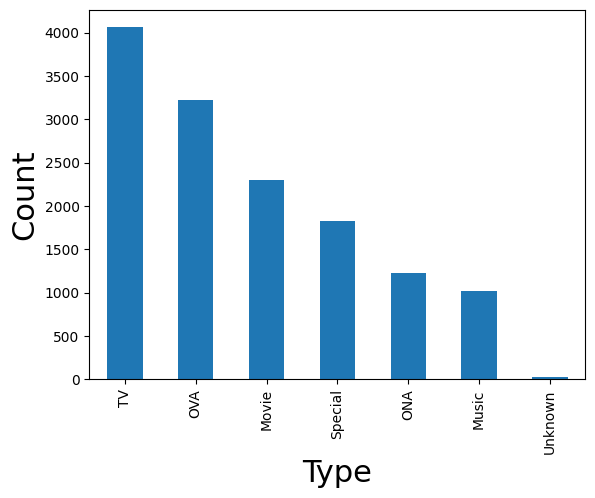

In [349]:

df2['Type'].value_counts().plot(kind='bar')
plt.xlabel('Type',size=22)
plt.ylabel('Count',size=22)
plt.show()



### Using the AST technique to convert Genre column into the list

In [350]:

def ast_function(text):
    text = ast.literal_eval(text)
    return text
    
df2['Genre'] = df2['Genre'].apply(ast_function)
df2['Genre']


0        [Action, Adventure, Comedy, Drama, Sci-Fi, Space]
1                  [Action, Space, Drama, Mystery, Sci-Fi]
2        [Action, Sci-Fi, Adventure, Comedy, Drama, Sho...
3        [Action, Magic, Police, Supernatural, Drama, M...
4              [Adventure, Fantasy, Shounen, Supernatural]
                               ...                        
15061          [Action, Adventure, Fantasy, Sci-Fi, Space]
15063                                        [Kids, Music]
15064                                        [Kids, Music]
15065      [Action, Adventure, Comedy, Historical, Seinen]
15074     [Action, Fantasy, Horror, Martial Arts, Samurai]
Name: Genre, Length: 13689, dtype: object

In [351]:

df2['Genre'][10]

['Action', 'Adventure', 'Comedy', 'Super Power', 'Martial Arts', 'Shounen']


### Removing the extra space between the mid words

In [352]:

df2['Genre']=df2['Genre'].apply(lambda x:[i.replace(' ','') for i in x])
df2['Genre']

0        [Action, Adventure, Comedy, Drama, Sci-Fi, Space]
1                  [Action, Space, Drama, Mystery, Sci-Fi]
2        [Action, Sci-Fi, Adventure, Comedy, Drama, Sho...
3        [Action, Magic, Police, Supernatural, Drama, M...
4              [Adventure, Fantasy, Shounen, Supernatural]
                               ...                        
15061          [Action, Adventure, Fantasy, Sci-Fi, Space]
15063                                        [Kids, Music]
15064                                        [Kids, Music]
15065      [Action, Adventure, Comedy, Historical, Seinen]
15074      [Action, Fantasy, Horror, MartialArts, Samurai]
Name: Genre, Length: 13689, dtype: object


### Converting the list into string

In [353]:

df2['Genre'] = df2['Genre'].apply(lambda x: ' '.join(x))
df2['Genre']

0            Action Adventure Comedy Drama Sci-Fi Space
1                     Action Space Drama Mystery Sci-Fi
2          Action Sci-Fi Adventure Comedy Drama Shounen
3        Action Magic Police Supernatural Drama Mystery
4                Adventure Fantasy Shounen Supernatural
                              ...                      
15061             Action Adventure Fantasy Sci-Fi Space
15063                                        Kids Music
15064                                        Kids Music
15065         Action Adventure Comedy Historical Seinen
15074         Action Fantasy Horror MartialArts Samurai
Name: Genre, Length: 13689, dtype: object


## Combine the Genre, Synopsis and Type Columns

In [354]:

df2['tags'] = df2['Genre']+df2['Synopsis']+df2['Type']

In [355]:
df2['tags']

0        Action Adventure Comedy Drama Sci-Fi Spaceyear...
1        Action Space Drama Mystery Sci-Fianoth day ano...
2        Action Sci-Fi Adventure Comedy Drama Shounenva...
3        Action Magic Police Supernatural Drama Mystery...
4        Adventure Fantasy Shounen Supernaturaldark cen...
                               ...                        
15061    Action Adventure Fantasy Sci-Fi Spaceorbit era...
15063    Kids Musicakai hana shiroi hana song origin cr...
15064    Kids Musicpair shoe left shoe anim object exci...
15065    Action Adventure Comedy Historical Seinenthird...
15074    Action Fantasy Horror MartialArts Samuraijapan...
Name: tags, Length: 13689, dtype: object


### Now Removing all the waste column

In [356]:

df3 = df2[['Title','tags']]


# Show top 5 rows

In [357]:

df3.head()

,Title,tags
0,Cowboy Bebop,Action Adventure Comedy Drama Sci-Fi Spaceyear...
1,Cowboy Bebop: Tengoku no Tobira,Action Space Drama Mystery Sci-Fianoth day ano...
2,Trigun,Action Sci-Fi Adventure Comedy Drama Shounenva...
3,Witch Hunter Robin,Action Magic Police Supernatural Drama Mystery...
4,Bouken Ou Beet,Adventure Fantasy Shounen Supernaturaldark cen...



### Ones more droping the duplicated value

In [358]:
df3.duplicated().sum()

42

In [359]:
df3.drop_duplicates(inplace=True)
print(f"After removing duplicated rows: {df3.duplicated().sum()}")

After removing duplicated rows: 0



# Using the Bag of words (countvectorizer)

In [360]:

count = CountVectorizer(max_features=6000)
vectores = count.fit_transform(df3['tags']).toarray()


In [361]:

vectores

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [362]:

count.get_feature_names_out()

array(['abandon', 'abduct', 'abe', ..., 'zoo', 'zoro', 'zorori'],
      dtype=object)


### Similarity

In [363]:
similar = cosine_similarity(vectores)
similar

array([[1.        , 0.26653374, 0.19367338, ..., 0.        , 0.14664712,
        0.09051256],
       [0.26653374, 1.        , 0.16002352, ..., 0.        , 0.08654846,
        0.04006415],
       [0.19367338, 0.16002352, 1.        , ..., 0.        , 0.13206764,
        0.0271713 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.14664712, 0.08654846, 0.13206764, ..., 0.        , 1.        ,
        0.05143445],
       [0.09051256, 0.04006415, 0.0271713 , ..., 0.        , 0.05143445,
        1.        ]])


### Making a function

In [364]:

def Recommander(movie_title):
    anime_id = df3[df3['Title']==movie_title].index[0]
    distance = similar[anime_id]
    top_anime = sorted(list(enumerate(distance)),reverse=True,key=lambda x:x[1])[1:6]

    for i in top_anime:
        print(df3.iloc[i[0]].Title)

In [367]:
Recommander('Witch Hunter Robin')

Witch Craft Works: Takamiya-kun to Imouto no Warudakumi
Ojamajo Doremi
Ojamajo Doremi Dokkaan!
Zero kara Hajimeru Mahou no Sho
Ling Qi 2


In [366]:

df3.head()

,Title,tags
0,Cowboy Bebop,Action Adventure Comedy Drama Sci-Fi Spaceyear...
1,Cowboy Bebop: Tengoku no Tobira,Action Space Drama Mystery Sci-Fianoth day ano...
2,Trigun,Action Sci-Fi Adventure Comedy Drama Shounenva...
3,Witch Hunter Robin,Action Magic Police Supernatural Drama Mystery...
4,Bouken Ou Beet,Adventure Fantasy Shounen Supernaturaldark cen...
